Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [11]:
import pandas as pd
user_data = pd.read_csv('3_user_data.csv')

In [12]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [18]:
logs = pd.read_csv('3_logs.csv')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [19]:
unique_num = logs.nunique()
unique_num

client      4011
success        2
platform       3
time        4376
dtype: int64

# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [23]:
successPlatform = logs\
    .query('success == True')\
    .platform.value_counts()\
    .idxmax()
successPlatform

'phone'

# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [34]:
successClient = logs\
    .query('success == True')\
    .client.value_counts()\
    .max()
successClient

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: count, Length: 2845, dtype: int64

In [35]:
success_counts = logs.loc[logs.success == True].client.value_counts()
max_num = success_counts.max()
max_success_users = success_counts.loc[success_counts == max_num]
max_success_users

client
61473    41
78349    41
36165    41
61468    41
92584    41
28719    41
82563    41
52870    41
12179    41
Name: count, dtype: int64

# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [26]:
merge = logs.merge(user_data, on='client')
merge

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [27]:
premiumPlatform = merge\
    .query('premium == True')\
    .platform.value_counts()\
    .idxmax()
premiumPlatform

'phone'

# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [38]:
premium = merge.query('premium == True')
premium

,client,success,platform,time,premium,age
1,35604,False,phone,1585459894,True,65
8,11983,True,phone,1585459511,True,68
11,99308,True,computer,1585409409,True,38
18,49625,False,phone,1585447789,True,65
23,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3366,20278,True,computer,1585456706,True,65
3394,78455,True,phone,1585459854,True,23
3396,57026,True,computer,1585438120,True,62
3417,2864,True,phone,1585459818,True,41


In [39]:
notPremium = merge.query('premium != True')
notPremium

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
5,32167,True,computer,1585457972,False,42
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


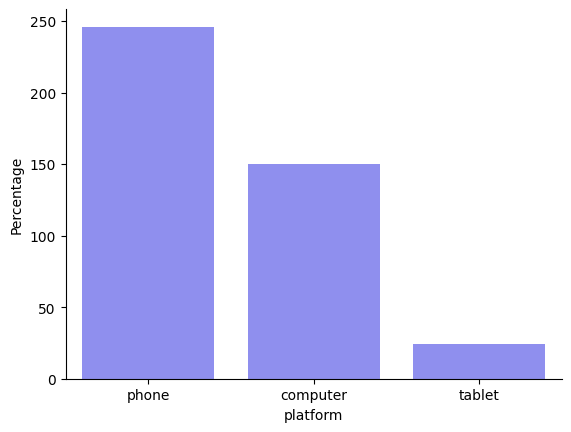

In [40]:
import seaborn as sns
ax = sns.countplot(x='platform', data=premium, color='blue', alpha=0.5)

ax.set(xlabel='Platform', ylabel='Clients')

sns.despine() # убрать часть рамки графика


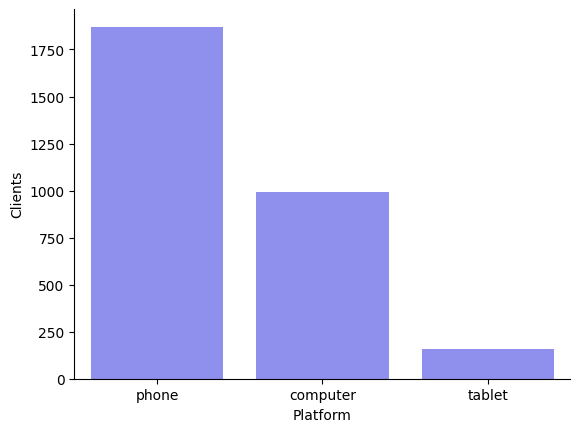

In [41]:
ax = sns.countplot(x='platform', data=notPremium, color='blue', alpha=0.5)
ax.set(xlabel='Platform', ylabel='Clients')
sns.despine() # убрать часть рамки графика

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

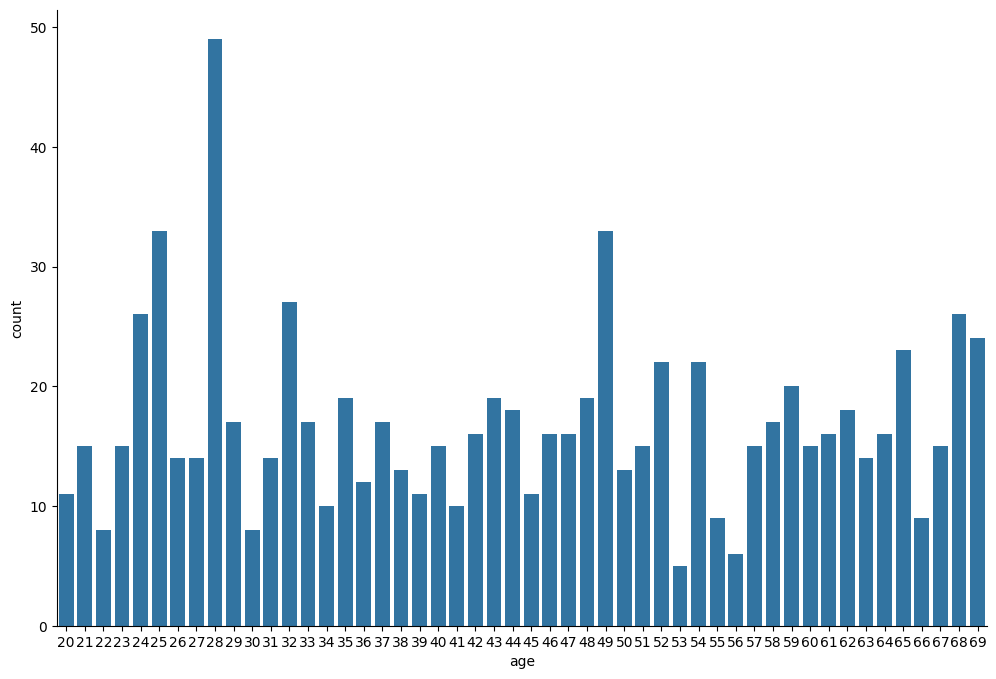

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.countplot(data=merge.loc[(merge.platform == 'computer') & (merge.success == True)], x = 'age')
sns.despine() # убрать часть рамки графика